# UNIVERSIDADE FEDERAL DE VIÇOSA - UFV

## Trabalho Prático - OpenCV
### Descrição das Funções

- Mateus Henrique Vieira Figueiredo - 4707
- Alan Gabriel Martins Silva - 4663

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Funções:

In [6]:
# Ler a imagem em escala de cinza
image = cv2.imread('images.png', cv2.IMREAD_GRAYSCALE)

#Desfoque gaussiano
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

_, binary_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)

# Abertura para remover pequenos ruídos
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

cv2.imwrite('binary_image.png', binary_image)

ValueError: Não foi possível carregar a imagem. Verifique o caminho e o nome do arquivo.

### cv2.findContours()

Usada para detectar contornos em uma imagem binária.

**Parâmetros:**
- **Image**: Uma imagem de 8 bits onde pixels não nulos são tratados como 1 e pixels zero permanecem como 0, resultando em uma imagem binária.
- **Contours**: São os contornos detectados na imagem, representados como vetores de pontos que definem as bordas de objetos ou regiões na imagem.
- **Hierarchy**: Um vetor opcional que descreve a relação topológica entre os contornos. Cada elemento corresponde a um contorno e contém índices de outros contornos no mesmo nível hierárquico (próximo e anterior), o primeiro filho do contorno e o contorno pai.
- **Mode**: Refere-se ao modo de recuperação de contornos, que especifica como os contornos são organizados e recuperados da imagem.
- **Method**: Indica o método usado para aproximar os contornos. Este método define como os contornos são simplificados para reduzir a quantidade de pontos necessários para representá-los.
- **Offset**: Um deslocamento opcional aplicado a todos os pontos de contorno, útil quando os contornos são extraídos de uma região de interesse (ROI) da imagem e precisam ser analisados no contexto da imagem completa.
- **Desfoque Gaussiano**: Aplicar desfoque gaussiano para suavizar a imagem:
Basicamente aplicação de desfoque sobre a imagem carregada em tons de cinza.
- **Ruídos**: Remoção de ruídos:
getStructuringElements e morphology ex aplicadas a imagem.

# Aplicar o threshold
_, binary_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)

---

In [23]:
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours[:1]

(array([[[  0,   0]],
 
        [[  0, 224]],
 
        [[224, 224]],
 
        [[224,   0]]], dtype=int32),)

### cv2.arcLength(contour, True)

Calcula o comprimento do contorno especificado.

**Parâmetros:**
- **Contour**: Representa o contorno cujo comprimento será calculado. Deve ser fornecido como uma matriz de pontos.
- **Closed**: Um booleano que determina se o contorno é considerado fechado.

---


In [24]:
contour = np.array([[10, 10], [10, 50], [50, 50], [50, 10]])
length = cv2.arcLength(contour, True)

print(f"Length of the contour: {length}")

Length of the contour: 160.0


### cv2.approxPolyDP(contour, epsilon, True)

Realiza uma aproximação poligonal de um contorno especificado, reduzindo o número de pontos necessários para representar o contorno.

**Parâmetros:**
- **Contour**: Representa o contorno cujo comprimento será calculado. Deve ser fornecido como uma matriz de pontos.
- **Epsilon**: Parâmetro de precisão que especifica a máxima distância entre o contorno original e sua aproximação poligonal.
- **Closed**: Um booleano que determina se o contorno é considerado fechado.

---

In [25]:
epsilon = 0.1 * length
approximated_contour = cv2.approxPolyDP(contour, epsilon, True)

print("Original contour points:")
print(contour)
print("\nApproximated contour points:")
print(approximated_contour)

Original contour points:
[[10 10]
 [10 50]
 [50 50]
 [50 10]]

Approximated contour points:
[[[10 10]]

 [[10 50]]

 [[50 50]]

 [[50 10]]]


### cv2.drawContours()

Usada para detectar contornos em uma imagem binária.

**Parâmetros:**
- **Image**: Uma imagem RGB de entrada.
- **Contours**: O vetor de contornos retornados pela `findContours()`.
- **ContourIdx**: Vetor com as coordenadas de cada contorno.
- **Colour**: A cor desejada para desenhar o contorno.
- **Thickness**: A espessura do contorno.

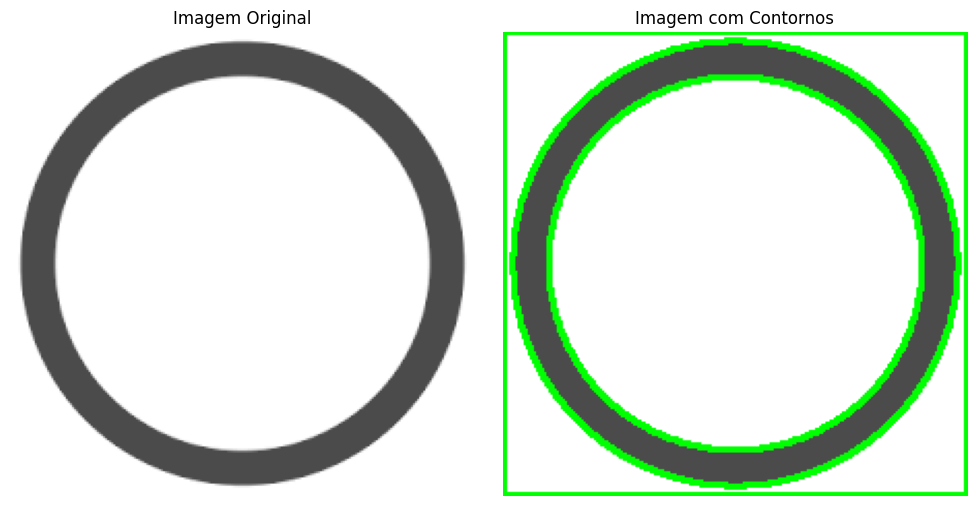

In [26]:
image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title('Imagem com Contornos')
plt.axis('off')

plt.tight_layout()
plt.show()

## Hierarquia dos Contornos

### Elementos dessa hierarquia:

- **Next**: Indica o próximo contorno em uma imagem, que está no mesmo nível hierárquico. Quando este valor é `-1`, indica que o próximo contorno não está no mesmo nível hierárquico.
- **Previous**: Indica o contorno anterior no mesmo nível hierárquico. Se este valor é `-1`, é porque o contorno anterior da hierarquia não está no mesmo nível.
- **First_Child**: Indica o primeiro contorno filho do contorno que estamos considerando atualmente. O valor `-1` indica que não tem nenhum filho (contorno interno).
- **Parent**: Indica a posição de índice do contorno pai para o contorno atual. `-1` indica que não tem contorno pai (externo).



### Cenários Comuns para a Hierarquia de Contornos

- **Contornos Independentes**: Se o valor de `Next` for `-1` e o valor de `Previous` também for `-1`, significa que o contorno atual não tem contornos irmãos no mesmo nível hierárquico.
- **Contornos Aninhados**: Se o valor de `First_Child` for diferente de `-1`, isso significa que o contorno atual tem pelo menos um contorno filho. O valor de `First_Child` indica o índice do primeiro contorno filho.
- **Contornos Externos**: Se o valor de `Parent` for `-1`, significa que o contorno atual não tem um contorno pai. Esses são os contornos mais externos na hierarquia.
- **Contornos Conectados**: Através da hierarquia, é possível identificar contornos que estão conectados uns aos outros. Ao percorrer a hierarquia, você pode acessar os contornos vizinhos, pais ou filhos de um determinado contorno.


## Exemplo

Hierarquia dos contornos:
----------------------------------------------------------------------------------------------------
Contorno	|\Hierarquia
----------------------------------------------------------------------------------------------------
Contorno 0	|	Next:-1, Previous:-1, First_Child:1, Parent:-1
Contorno 1	|	Next:-1, Previous:-1, First_Child:2, Parent:0
Contorno 2	|	Next:-1, Previous:-1, First_Child:-1, Parent:1
----------------------------------------------------------------------------------------------------


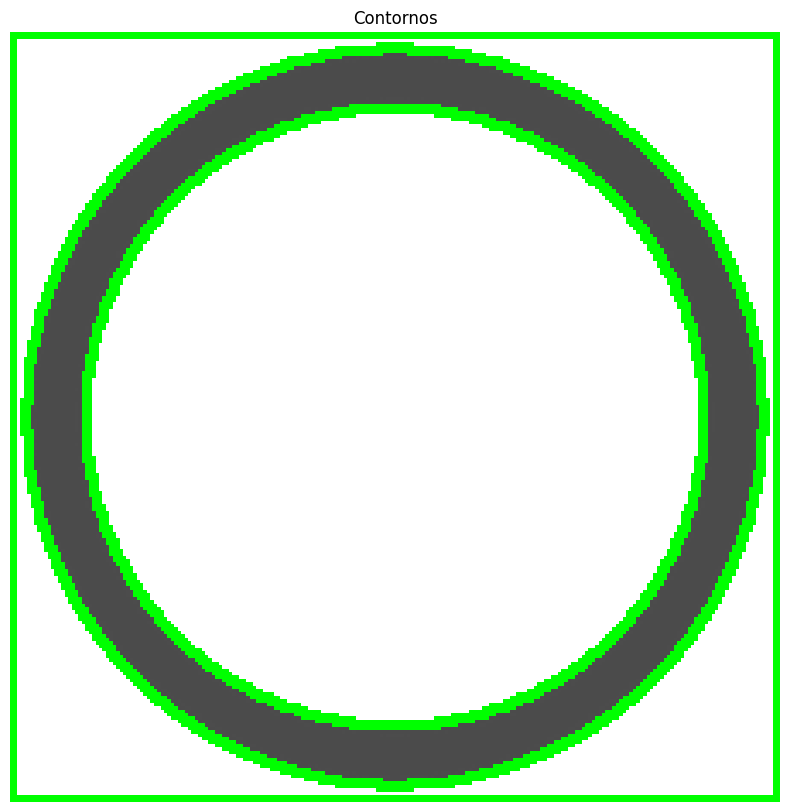

In [37]:
# Encontrar contornos e hierarquia
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Converter imagem BGR para RGB para exibição com matplotlib
output = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Colorir os contornos na imagem
cv2.drawContours(output, contours, -1, (0, 255, 0), 2)  # Cor verde, espessura 2

# Exibir hierarquia em formato de matriz
print("Hierarquia dos contornos:")
print("-"*100)
print("Contorno\t|\Hierarquia")
print("-"*100)
for i, contour in enumerate(contours):
    next_, previous, first_child, parent = hierarchy[0][i]
    hierarchy_text = f"Next:{next_}, Previous:{previous}, First_Child:{first_child}, Parent:{parent}"
    print(f"Contorno {i}\t|\t{hierarchy_text}")
print("-"*100)

plt.figure(figsize=(10, 10))
plt.imshow(output)
plt.title('Contornos')
plt.axis('off')
plt.show()